<a href="https://colab.research.google.com/github/vallirajasekar/Image_Resolution/blob/main/Image_Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np


In [3]:
from zipfile import ZipFile
file_name="Computer_Vision.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')


Done


In [4]:
img=image.load_img("/content/Computer_Vision/Base_Data /training/happy/download (1).jpeg")

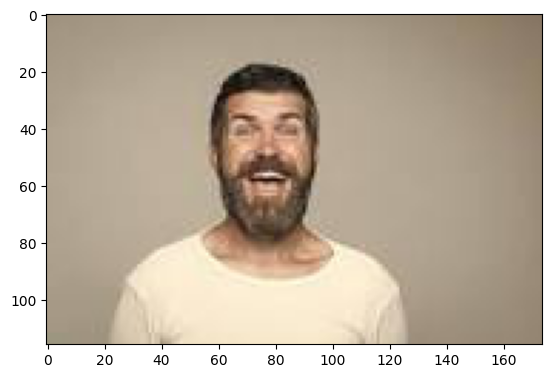

In [5]:
plt.imshow(img)

In [6]:
cv2.imread('/content/Computer_Vision/Base_Data /training/happy/download (1).jpeg').shape

(116, 174, 3)

In [7]:
train = ImageDataGenerator(rescale=1/255)

In [9]:
Validation=ImageDataGenerator(rescale=1/255)

In [10]:
train_dateset=train.flow_from_directory('/content/Computer_Vision/Base_Data /training',target_size=(200,200),batch_size=3,class_mode='binary')

Found 16 images belonging to 2 classes.


In [12]:
from keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator for validation data
Validation = ImageDataGenerator(rescale=1/255)

# Specify the path to the validation dataset directory
validation_directory = '/content/Computer_Vision/Base_Data /Validation'

# Define the validation dataset generator
validation_dataset = Validation.flow_from_directory(
    validation_directory,
    target_size=(200, 200),
    batch_size=3,
    class_mode='binary'
)


Found 5 images belonging to 2 classes.


In [14]:
train_dateset.class_indices

{'happy': 0, 'not_happy': 1}

In [15]:
train_dateset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int32)

In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [21]:
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01), metrics=['accuracy'])


In [26]:
model_fit=model.fit(train_dateset,steps_per_epoch=3,epochs=20,validation_data=validation_dataset)

Epoch 1/20
3/3 [==============================] - 10s 3s/step - loss: 0.7254 - accuracy: 0.7143 - val_loss: 0.7553 - val_accuracy: 0.6000
Epoch 2/20
3/3 [==============================] - 3s 1s/step - loss: 0.7730 - accuracy: 0.5556 - val_loss: 0.6725 - val_accuracy: 0.6000
Epoch 3/20
3/3 [==============================] - 3s 1s/step - loss: 0.6165 - accuracy: 0.6667 - val_loss: 0.6755 - val_accuracy: 0.6000
Epoch 4/20
3/3 [==============================] - 4s 1s/step - loss: 0.7508 - accuracy: 0.4444 - val_loss: 0.6752 - val_accuracy: 0.6000
Epoch 5/20
3/3 [==============================] - 2s 846ms/step - loss: 0.6348 - accuracy: 0.7143 - val_loss: 0.6738 - val_accuracy: 0.6000
Epoch 6/20
3/3 [==============================] - 3s 882ms/step - loss: 0.5856 - accuracy: 0.7143 - val_loss: 0.6939 - val_accuracy: 0.6000
Epoch 7/20
3/3 [==============================] - 2s 611ms/step - loss: 0.7381 - accuracy: 0.8571 - val_loss: 0.6718 - val_accuracy: 0.6000
Epoch 8/20
3/3 [===============

In [38]:

for i in os.listdir(dir_path ):
  img=image.load_img(dir_path+'//'+str(i))
  plt.imshow(img)
  plt.show()

UnidentifiedImageError: ignored

In [40]:
from keras.preprocessing import image as image_utils

dir_path='/content/Computer_Vision/Base_Data /testing'

for i in os.listdir(dir_path):
    file_path = os.path.join(dir_path, i)
    if image_utils.is_image(file_path):
        img = image.load_img(file_path)
        plt.imshow(img)
        plt.show()
    else:
        print(f"Skipping non-image file: {file_path}")


AttributeError: ignored

In [36]:
dir_path

'/content/Computer_Vision/Base_Data /testing'

In [41]:
from PIL import Image

dir_path = '/content/Computer_Vision/Base_Data /testing'

for i in os.listdir(dir_path):
    file_path = os.path.join(dir_path, i)
    try:
        img = Image.open(file_path)
        img.load()
        plt.imshow(img)
        plt.show()
    except (OSError, Image.UnidentifiedImageError) as e:
        print(f"Skipping non-image file: {file_path}")
        print(e)


Skipping non-image file: /content/Computer_Vision/Base_Data /testing/.DS_Store
cannot identify image file '/content/Computer_Vision/Base_Data /testing/.DS_Store'
Skipping non-image file: /content/Computer_Vision/Base_Data /testing/not_happy
[Errno 21] Is a directory: '/content/Computer_Vision/Base_Data /testing/not_happy'
Skipping non-image file: /content/Computer_Vision/Base_Data /testing/happy
[Errno 21] Is a directory: '/content/Computer_Vision/Base_Data /testing/happy'


In [42]:
from PIL import Image

dir_path = '/content/Computer_Vision/Base_Data /testing'

for i in os.listdir(dir_path):
    file_path = os.path.join(dir_path, i)
    if os.path.isfile(file_path):
        try:
            img = Image.open(file_path)
            img.load()
            plt.imshow(img)
            plt.show()
        except (OSError, Image.UnidentifiedImageError) as e:
            print(f"Skipping non-image file: {file_path}")
            print(e)
    else:
        print(f"Skipping directory: {file_path}")


Skipping non-image file: /content/Computer_Vision/Base_Data /testing/.DS_Store
cannot identify image file '/content/Computer_Vision/Base_Data /testing/.DS_Store'
Skipping directory: /content/Computer_Vision/Base_Data /testing/not_happy
Skipping directory: /content/Computer_Vision/Base_Data /testing/happy


In [32]:

for i in os.listdir(dir_path):
    file_path = os.path.join(dir_path, i)
    try:
        img = image.load_img(file_path)
        plt.imshow(img)
        plt.show()
    except (UnidentifiedImageError, FileNotFoundError) as e:
        print(f"Error loading image: {file_path}")
        print(e)


NameError: ignored

In [30]:
dir_path = '/content/Computer_Vision/Base_Data /testing'

for i in os.listdir(dir_path):
    img=image.load_img(dir_path+'//'+i)
    plt.imshow(img)
    
   

UnidentifiedImageError: ignored